# Additional Part
using Numpy and vertor

<a name="toc_40291_2"></a>
# Problem Statement

Let's use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

1. Activation Fucntion 

So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x_data = np.array([1, 2])     # Size
y_data = np.array([300, 500]) # Price

In [2]:
print(f"x_data: {x_data}")
print(f"x_data.shape : {x_data.shape}")


x_data: [1 2]
x_data.shape : (2,)


In [3]:
def Linear_model(x, w, b):
    '''
    Input:
        w : Int, representing weight
        b : Int, Bias
        x : NumpyArray, repersenting Size of the house 
    Output:
        y_hat : NumpyArray, prediction of Price, based on y = w * x
    '''  
    f_wb = w * x + b


    y_hat = f_wb
        
    return y_hat

# Set initial w value
w_init = 250
b_init = 25
y_hat = Linear_model(x_data, w_init, b_init)
print(f"The result of prediction of y: {y_hat}")


The result of prediction of y: [275 525]


# 2.Cost Function
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [4]:
#Cost Function
def Cost_function(x, y, w, b):
    '''
    Input:
        w : Int, representing weight
        b : Int, Bias
        x : NumpyArray, representing Size of the house 
        y : NumpyArray, representing Price of the house
    Output:
        Cost : Int
    '''  

    m = len(y)
    cost = 0
    f_wb = Linear_model(x, w, b)
    
    #TODO:
    

    
    return cost
        
cost = Cost_function(x_data, y_data, w_init, b_init)
cost 


312.5

# 3. Gradient descent
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [5]:
#Gradient Descent
def gradient_function(x, y, w, b):
    '''
    Input:
        w : Int, representing weight
        b : Int, Bias
        x : NumpyArray, representing Size of the house 
        y : NumpyArray, representing Price of the house
    Output:
        dj_dw : Float
        dj_db : Float
    '''  
    dj_dw = 0.0
    dj_db = 0.0
    f_wb = Linear_model(x, w, b)
    m = len(x)
    #TODO:
    ...


    dj_dw /= m
    dj_db /= m
    
    return dj_dw,dj_db    

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  


Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [6]:
def Gradient_Descent(x, y , w_init, b_init, lr, iteration):
    '''
    Input:
        w_init : Int, initial weight

        b_init : Int, initial bias

        x : NumpyArray, representing Size of the house 

        y : NumpyArray, representing Price of the house

    Output:
        cost_history: List, recording cost

        w_history: List, recording weight

        b_history: List, recording bias
    '''  
    #For drawing figure, do not care
    cost_history = []
    w_history = []
    b_history = []
    #Start Here
    w = w_init
    b = b_init
    
    for num in range(iteration):

        
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - dj_dw * lr
        b = b - dj_db * lr

        #For drawing figure, do not care
        cost = Cost_function(x,y,w,b)
        cost_history.append(cost)
        w_history.append(w)
        b_history.append(b)
        if (num % 100 == 0):
            print(f"Iter:{num:4}, Cost : {cost:0.4e}")
                  

    return w,cost,w_history,cost_history,b_history

# 4. Modulation Part
lr : learning rate \
iteration : the total amount of trainig \
You can justify lr and iteration to see the ultimate effect

In [15]:
#Hyperparametres
w_init = 0
b_init = 0
lr = 0.01
iteration  = 10000
w_new,cost_new,w_history,cost_history,b_history = Gradient_Descent(x_data,y_data,w_init,b_init,lr,iteration)


Iter:   0, Cost : 7.9275e+04
Iter:  10, Cost : 3.9475e+04
Iter:  20, Cost : 1.9660e+04
Iter:  30, Cost : 9.7951e+03
Iter:  40, Cost : 4.8835e+03
Iter:  50, Cost : 2.4381e+03
Iter:  60, Cost : 1.2205e+03
Iter:  70, Cost : 6.1419e+02
Iter:  80, Cost : 3.1225e+02
Iter:  90, Cost : 1.6183e+02
Iter: 100, Cost : 8.6850e+01
Iter: 110, Cost : 4.9429e+01
Iter: 120, Cost : 3.0709e+01
Iter: 130, Cost : 2.1300e+01
Iter: 140, Cost : 1.6529e+01
Iter: 150, Cost : 1.4068e+01
Iter: 160, Cost : 1.2758e+01
Iter: 170, Cost : 1.2022e+01
Iter: 180, Cost : 1.1574e+01
Iter: 190, Cost : 1.1269e+01
Iter: 200, Cost : 1.1038e+01
Iter: 210, Cost : 1.0844e+01
Iter: 220, Cost : 1.0670e+01
Iter: 230, Cost : 1.0507e+01
Iter: 240, Cost : 1.0351e+01
Iter: 250, Cost : 1.0199e+01
Iter: 260, Cost : 1.0050e+01
Iter: 270, Cost : 9.9041e+00
Iter: 280, Cost : 9.7603e+00
Iter: 290, Cost : 9.6188e+00
Iter: 300, Cost : 9.4793e+00
Iter: 310, Cost : 9.3420e+00
Iter: 320, Cost : 9.2066e+00
Iter: 330, Cost : 9.0732e+00
Iter: 340, Cos

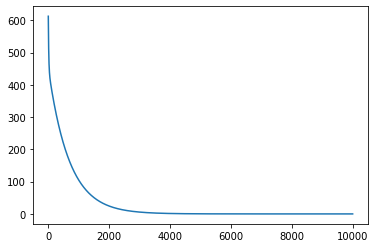

In [14]:
plt.plot(cost_history)
